# Análisis y gráficas 

## 0. Introducción
En este Jupyter Notebook se encuentran los resultados de anáilisis en base a los **Data Products** resultantes.

## 1. Cargar librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Cargar datos (Data)

In [3]:
dp1 = pd.read_csv('Data/DP1_vacunados_y_fallecidos_x_semanaEpi.csv')
dp1.head()

,year,epi_week,total_casos,total_fallecidos,total_dosis_1,total_dosis_2,total_dosis_3,0_17_fal,18_29_fal,30_39_fal,...,LORETO_vac,MADRE DE DIOS_vac,MOQUEGUA_vac,PASCO_vac,PIURA_vac,PUNO_vac,SAN MARTIN_vac,TACNA_vac,TUMBES_vac,UCAYALI_vac
0,2020,10,6,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,11,51,3,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,12,279,36,0,0,0,0,2,3,...,0,0,0,0,0,0,0,0,0,0
3,2020,13,458,64,0,0,0,5,3,4,...,0,0,0,0,0,0,0,0,0,0
4,2020,14,1993,226,0,0,0,3,5,13,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dp2 = pd.read_csv('Data/DP2_TOTAL_vacunados_y_fallecidos_x_departamento.csv')
dp2.head()

,departamentos,fallecidos,dosis_1,dosis_2,dosis_3,no_habitantes,tasa_mortalidad,vac_porcentaje
0,AMAZONAS,1288,262489,223087,35796,426806,301.78,52.27
1,ANCASH,6771,918338,850379,171010,1180638,573.50,72.03
2,APURIMAC,1526,343054,295566,42334,430736,354.28,68.62
3,AREQUIPA,9765,1163358,1052414,195194,1497438,652.11,70.28
4,AYACUCHO,2162,428507,336018,32633,668213,323.55,50.29


## 3. Gráfica de TOTAL de fallecidos por COVID-19 por semana epidemiológica en Perú

Fecha de la segunda ola tomada del [Documento Técnico: Plan Nacional Actualizado de Vacunación contra la COVID-19](https://cdn.www.gob.pe/uploads/document/file/1805113/Plan%20Nacional%20Actualizado%20contra%20la%20COVID-19.pdf)

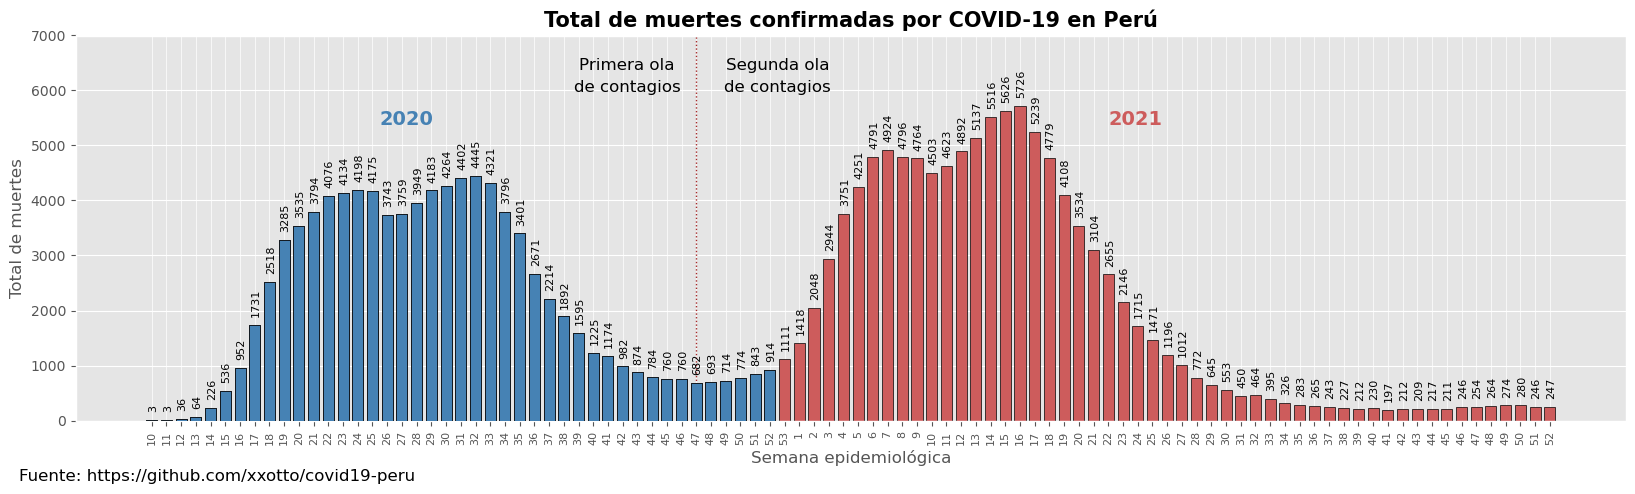

In [13]:
df1 = dp1[['year', 'epi_week', 'total_fallecidos']]

def barplot_dec(df, fal):

    plt.figure(figsize=(20, 5)) # Create a figure
    plt.style.use('ggplot') # Using the style for the plot
    
    width = 0.75 # Bar width
    x = np.arange(len(df["epi_week"]))
    a = plt.bar(x, df[fal], width, color="indianred", edgecolor="black", zorder=2)  # Create bars
    plt.bar(np.arange(0,43), df[fal].iloc[0:43], width, color="steelblue", edgecolor="black", zorder=3) 
    
    plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis
    plt.yticks(np.arange(0, 7500, 1000))  # Range on y axis

    plt.title("Total de muertes confirmadas por COVID-19 en Perú", fontsize=15, weight="bold")
    plt.xlabel("Semana epidemiológica", fontsize=12)
    plt.ylabel("Total de muertes", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 8)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width()/2 +.09, 150 + height,
                    '%d' % int(height), ha='center', va='bottom',
                    rotation = 90, fontsize=8)

    autolabel(a)

    plt.text(15.5, 5375, r"2020", fontsize=14, color = "steelblue", weight="bold")
    plt.text(65, 5375, r"2021", fontsize=14, color="indianred", weight="bold")

    plt.text(29, 6375, r"Primera ola", fontsize=12)
    plt.text(28.7, 5975, r"de contagios", fontsize=12)
    plt.text(39, 6375, r"Segunda ola", fontsize=12)
    plt.text(38.9, 5975, r"de contagios", fontsize=12)

    # In week 47 start the new wave (01/12/2020)
    plt.axvline(x=37, color="brown", linestyle=":", linewidth=1, zorder=1)  

    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-9, -1100, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_fallecidos_x_semanaEpi.png', bbox_inches='tight') # Save figure
    plt.show() # Plot figure

barplot_dec(df1, 'total_fallecidos')

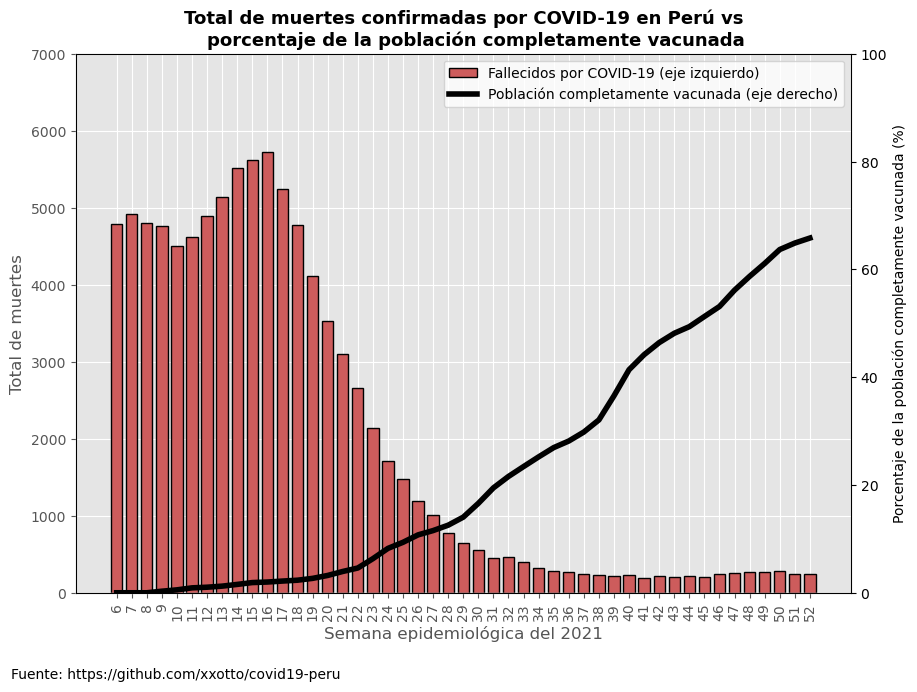

In [12]:
cumsum_vac = pd.DataFrame(round(dp1.total_dosis_2.cumsum()*100/32625948, 2))

def barplot_dec(df, fal):

    fig = plt.figure(figsize=(10, 7)) # Create a figure
    ax = fig.add_subplot(111)
    plt.style.use('default') # Using the style for the plot
    
    # Fallecidos desde que empezó la jornada de vacunación en semana epi 5 del 2021
    fal = df[fal].iloc[49:]
    
    # Primera gráfica de barras
    width = 0.75 # Bar width
    x = np.arange(len(fal))
    ax.bar(x, fal, width, color="indianred", edgecolor="black", zorder=2,
                    label='Fallecidos por COVID-19 (eje izquierdo)') 
    
    plt.xticks(x, df["epi_week"].iloc[49:], rotation = 90) 
    plt.yticks(np.arange(0, 7500, 1000))
    plt.ylabel("Total de muertes", fontsize = 12)
    plt.tick_params(axis="x", labelsize = 10)

    plt.title("""Total de muertes confirmadas por COVID-19 en Perú vs
    porcentaje de la población completamente vacunada""",
              fontsize=13, weight="bold")
    plt.xlabel("Semana epidemiológica del 2021", fontsize=12)

    # Segunda gráfica de frecuencia acumulada de fallecidos
    ax2 = plt.twinx()
    ax2.plot(x, cumsum_vac ['total_dosis_2'].iloc[49:], color='black', linestyle="-", linewidth=4, 
            label='Población completamente vacunada (eje derecho)')
    ax2.set_ylim(0,100,10)

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    ax2.set_ylabel('Porcentaje de la población completamente vacunada (%)')

    plt.text(-7, -16, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=10)

    plt.savefig('Images/covid19-peru_fallecidos_vs_vacunados_x_semanaEpi.png', bbox_inches='tight')
    plt.show() # Plot figure

barplot_dec(dp1, 'total_fallecidos')


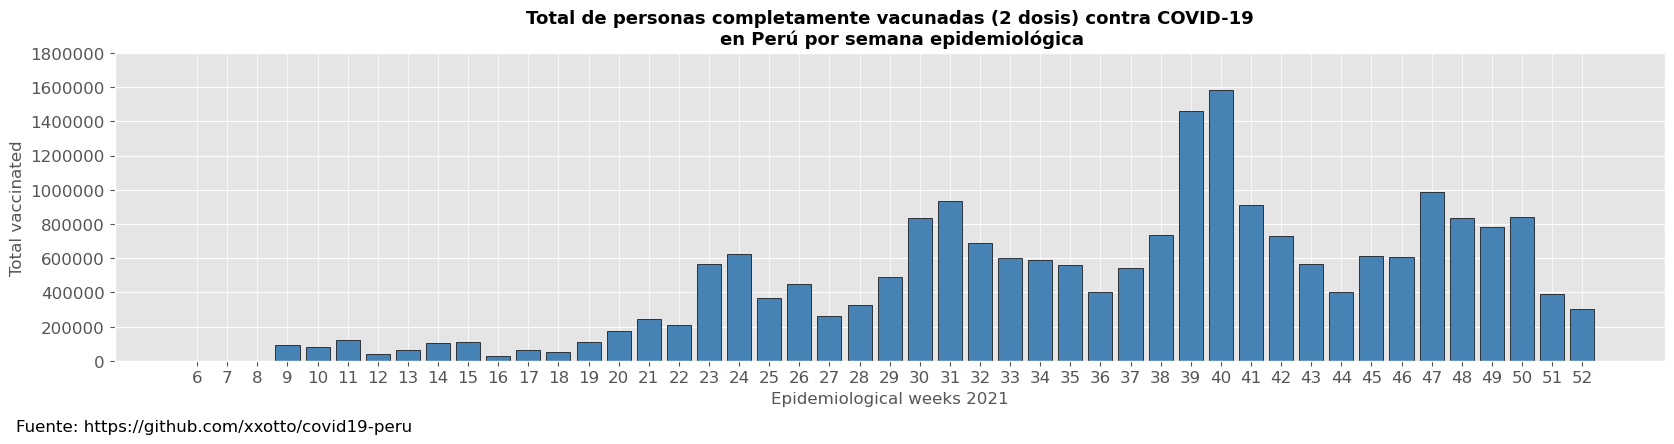

In [9]:
# Barplot of TOTAL VACCINATED
def barplot_vac(df,vac):

    # Create a figure
    plt.figure(figsize=(20, 4))

    # Using the style for the plot
    plt.style.use('ggplot')

    y_position = np.arange(len(df["epi_week"].iloc[49:]))

    plt.tick_params(axis="x", labelsize=12)
    plt.tick_params(axis="y", labelsize=12)

    plt.bar(y_position, df[vac].iloc[49:], color="steelblue", edgecolor="black")  # Create bars
    plt.xticks(y_position, df["epi_week"].iloc[49:])  # Create names on the x-axis
    plt.yticks(np.arange(0, 2000000, 200000))
    plt.ticklabel_format(axis="y", style="plain")
    
    plt.title("""Total de personas completamente vacunadas (2 dosis) contra COVID-19
    en Perú por semana epidemiológica""",
              fontsize=13, weight="bold")
    plt.xlabel("Epidemiological weeks 2021")
    plt.ylabel("Total vaccinated")
    
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-6, -410000, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)

    plt.savefig('Images/covid19-peru_vacunados_x_semanaEpi.png', bbox_inches='tight')
    plt.show()

barplot_vac(dp1, 'total_dosis_2')

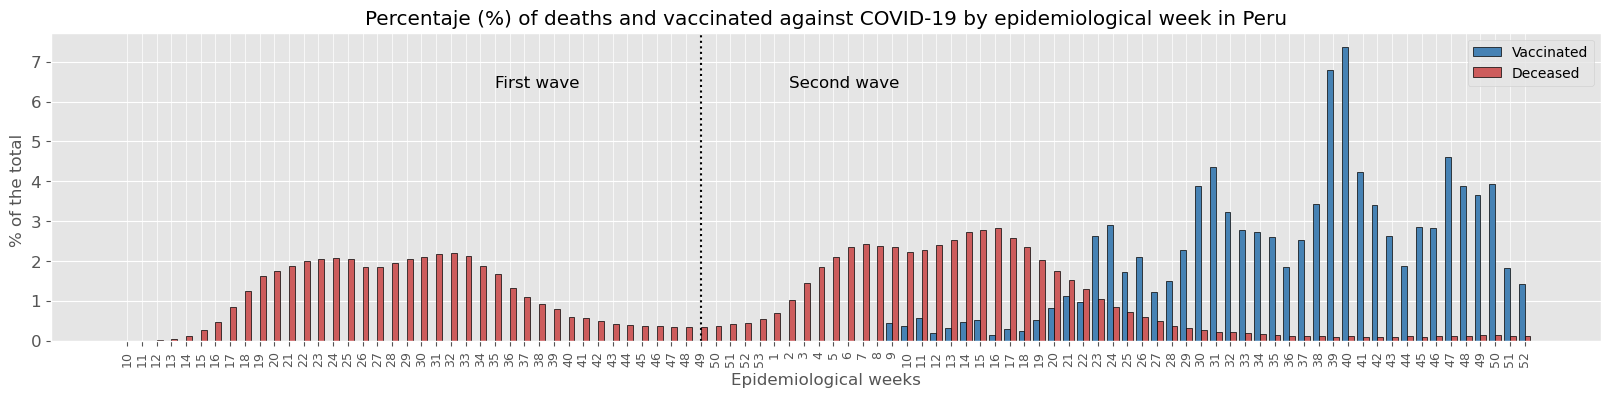

In [10]:
percents = pd.DataFrame(dp1.total_fallecidos*100/dp1.total_fallecidos.sum())
percents['total_vacunados'] = pd.DataFrame(dp1.total_dosis_2*100/dp1.total_dosis_2.sum())

def barplot_epi(df):
       
       # Create a figure
       plt.figure(figsize=(20, 4))

       # Using the style for the plot
       plt.style.use('ggplot')

       x = np.arange(len(df['epi_week']))
       width = 0.40  # the width of the bars
       
       plt.bar(x - width/2, percents['total_vacunados'], width, label='Vaccinated', color = 'steelblue', edgecolor='black')
       plt.bar(x + width/2, percents['total_fallecidos'], width, label='Deceased', color = 'indianred', edgecolor='black')
       
       # Add some text for labels, title and custom x-axis tick labels, etc.
       plt.ylabel('% of the total ')
       plt.xlabel('Epidemiological weeks')
       plt.title('Percentaje (%) of deaths and vaccinated against COVID-19 by epidemiological week in Peru')
       plt.xticks(x, df["epi_week"], rotation = 90)  # Create names on the x-axis

       plt.legend()
       plt.tick_params(axis='x', labelsize=9)
       plt.tick_params(axis='y', labelsize=12)

       plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
       plt.rcParams["axes.axisbelow"] = True
       
       # Plot line (01/12/2020 week 49, 2nd wave)
       plt.axvline(x=39, color='black', linestyle='dotted', linewidth=1.5)

       # Plot text
       plt.text(25, 6.35, r'First wave', fontsize=12)
       plt.text(45, 6.35, r'Second wave', fontsize=12)

       # Plot
       plt.savefig('Images/covid19-peru_proporcion_vacunados_fallecidos_x_semanaEpi.png', bbox_inches='tight')
       plt.show()
       

barplot_epi(dp1)

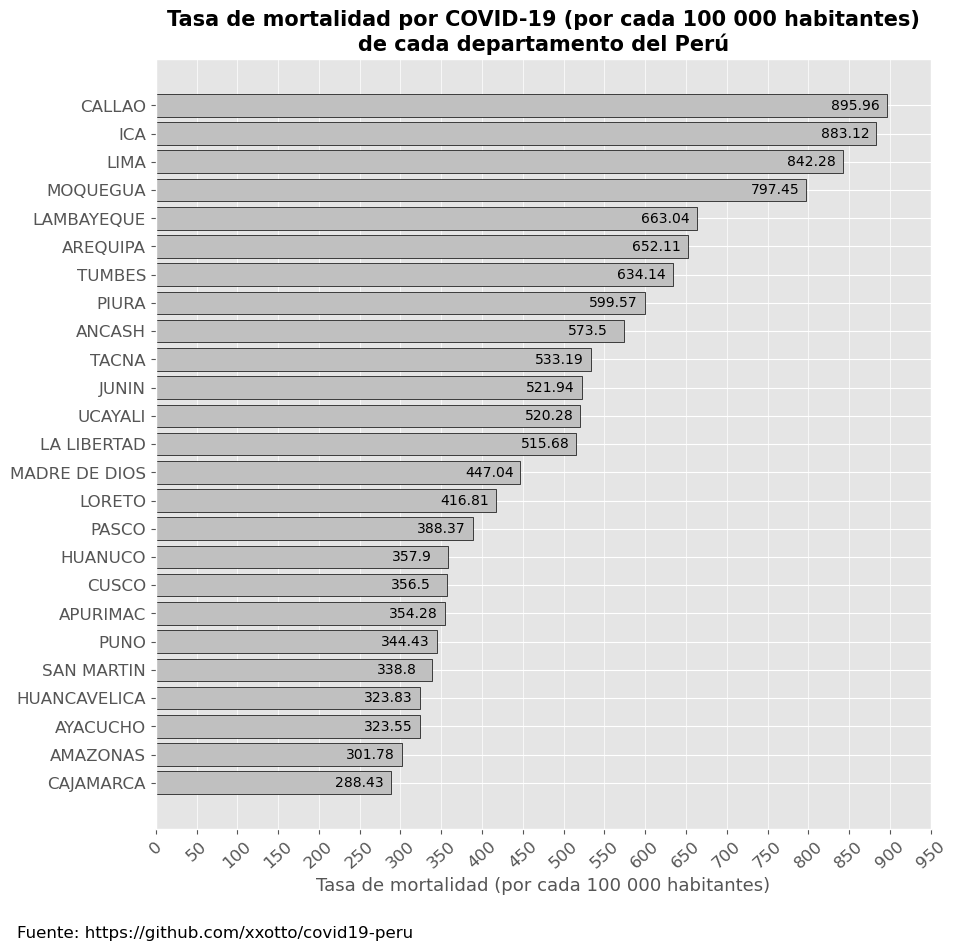

In [11]:
def barplot_dep(df):
     
    # Create a figure
    fig, ax = plt.subplots(figsize=(10,10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["departamentos"]))
    df = df.sort_values(by=["tasa_mortalidad"])

    # Create bars
    bh = plt.barh(y_pos, df["tasa_mortalidad"], color="silver", edgecolor="black")
    #plt.barh(18, df["tasa_mortalidad"].iloc[18], color="indianred", edgecolor="black")
    ax.bar_label(ax.containers[0], label_type= 'edge', padding=-40)

    # Create names on the x-axis
    plt.xticks(np.arange(0, 1000, 50),rotation = 42)
    plt.yticks(y_pos, df["departamentos"], fontsize=12)

    # Labels
    plt.title("Tasa de mortalidad por COVID-19 (por cada 100 000 habitantes)\nde cada departamento del Perú",
             fontsize=15, weight="bold")
    plt.xlabel("Tasa de mortalidad (por cada 100 000 habitantes)", fontsize=13)
    plt.tick_params(axis="x", labelsize=12)

    #plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)

    # Configure grid
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-170, -5.5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)
    
    # Show graphic
    plt.savefig('Images/covid19-peru_fallecidos_x_departamentos.png', bbox_inches='tight')
    plt.show()

barplot_dep(dp2)

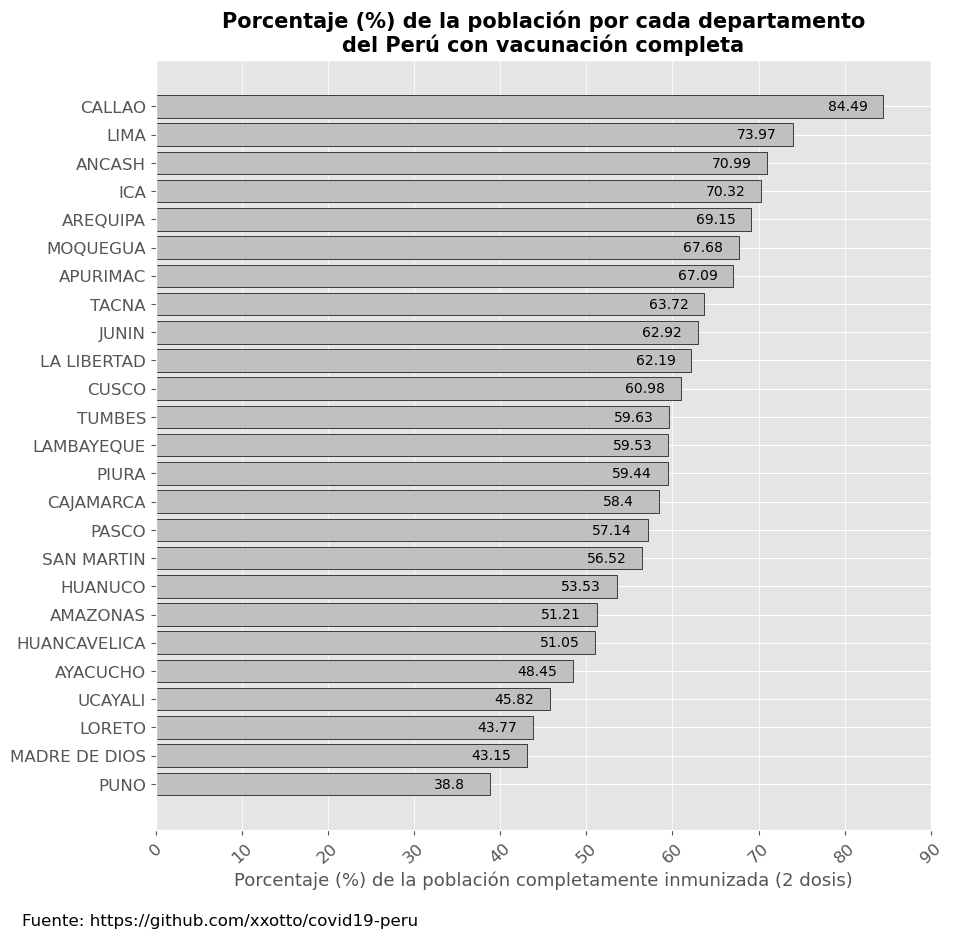

In [9]:
def barplot_dep(df):
     
    # Create a figure
    fig, ax = plt.subplots(figsize=(10,10))

    # Using the style for the plot
    plt.style.use('ggplot')

    # Create y positions
    y_pos = np.arange(len(df["departamentos"]))
    df = df.sort_values(by=["vac_porcentaje"])

    # Create bars
    bh = plt.barh(y_pos, df['vac_porcentaje'], color="silver", edgecolor="black")
    #plt.barh(18, df["tasa_mortalidad"].iloc[18], color="indianred", edgecolor="black")
    ax.bar_label(ax.containers[0], label_type= 'edge', padding=-40)

    # Create names on the x-axis
    plt.xticks(np.arange(0, 100, 10),rotation = 42)
    plt.yticks(y_pos, df["departamentos"], fontsize=12)

    # Labels
    plt.title("Porcentaje (%) de la población por cada departamento\ndel Perú con vacunación completa",
             fontsize=15, weight="bold")
    plt.xlabel("Porcentaje (%) de la población completamente inmunizada (2 dosis)", fontsize=13)
    plt.tick_params(axis="x", labelsize=12)

    #plt.axvline(x=613.7630085109, color="brown", linestyle="dashed", linewidth=.75)

    # Configure grid
    plt.grid(True, axis= "x", linewidth=.5, linestyle="-")  # Configure grid
    plt.rcParams["axes.axisbelow"] = True

    plt.text(-15.5, -5, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=12)
    
    # Show graphic
    plt.savefig('Images/covid19-peru_vacunados_x_departamentos.png', bbox_inches='tight')
    plt.show()

barplot_dep(dp2)

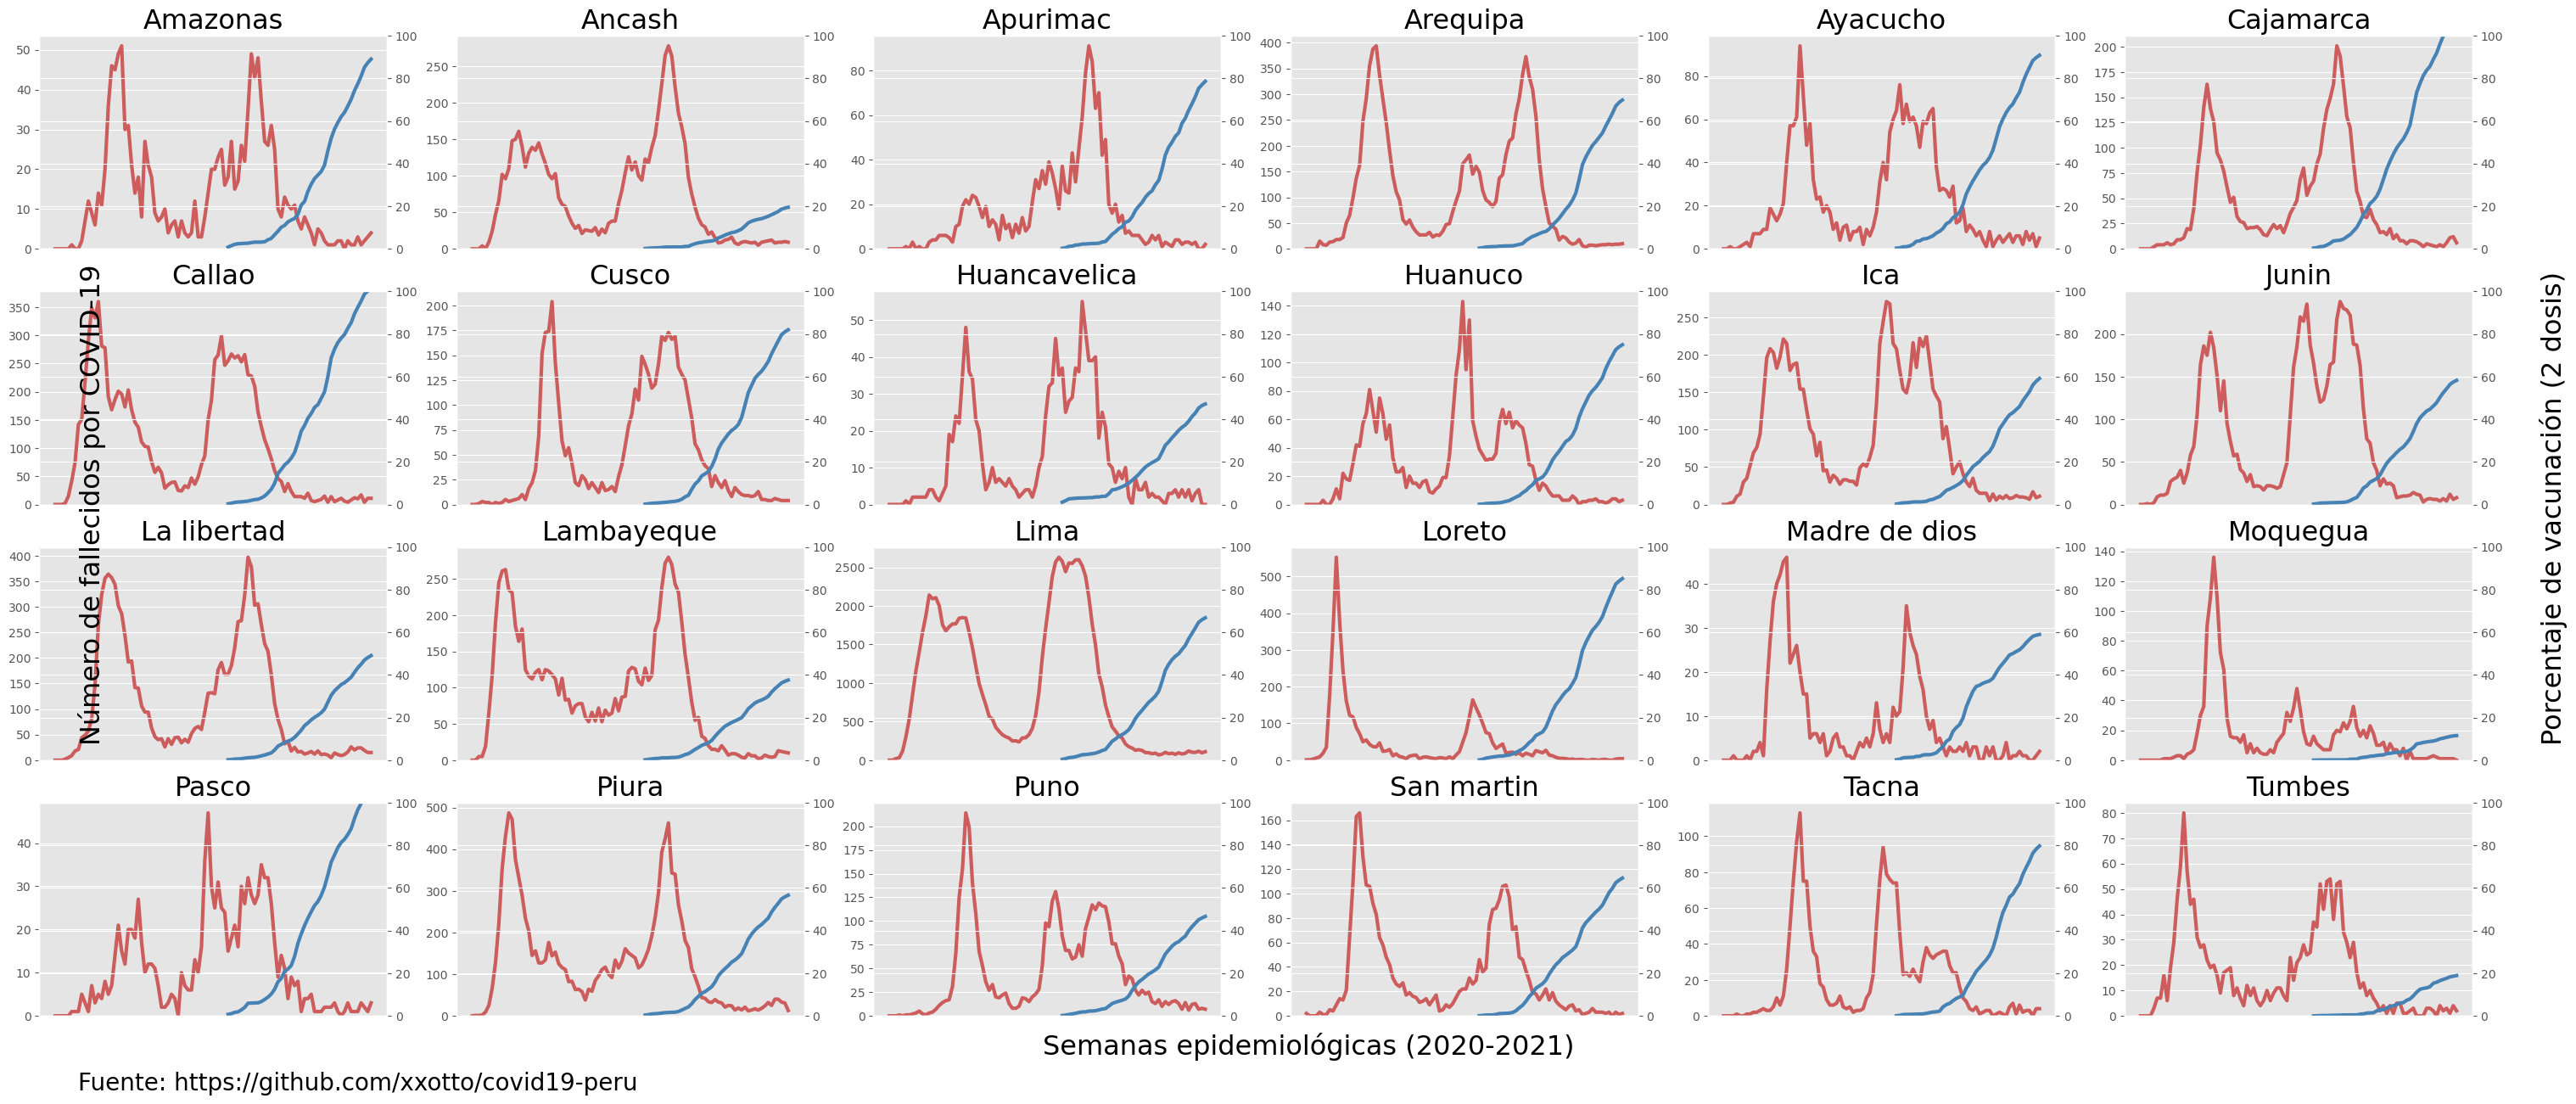

In [15]:
lst_habitantes, lst_cumper_vac = [], []
i, j = 0,0

# Eje X compartido por todos los subplots (epi_weeks)
X = np.arange(len(dp1['epi_week']))

# Initialise the subplot function using number of rows and columns
fig, axis = plt.subplots(4, 6, figsize=(37,15),)
plt.style.use('ggplot')

for idx, departamento in enumerate(dp2.departamentos):
    
    lst_habitantes.append(int(dp2.no_habitantes.loc[dp2.departamentos == departamento]))
    lst_cumper_vac.append(pd.DataFrame(round(dp1[departamento + '_vac'].cumsum()*100/lst_habitantes[idx], 2)))
    # Colocar vacíos antes que empezara la vacunación masiva de segundas dosis
    lst_cumper_vac[idx].loc[0:51] = np.nan

    axis[i, j].plot(X, dp1[dp2.departamentos[idx] + '_fal'], color = 'indianred', linewidth=3)
    axis[i, j].set_title(dp2.departamentos[idx].capitalize(), fontsize=23,)
    axis[i, j].set_ylim(ymin=0)

    axis2 = axis[i, j].twinx()
    axis2.plot(X, lst_cumper_vac[idx], color='steelblue', linewidth=3)
    axis2.set_ylim(0,100,10)

    axis[i, j].get_xaxis().set_visible(False)
    
    j+=1
    if j==6:
        i+=1
        j=0
        if i == 4:
            break

plt.text(-620, -35, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=20)

plt.text(-330, -18, r"Semanas epidemiológicas (2020-2021)", fontsize=23)
plt.text(-620, 130, r"Número de fallecidos por COVID-19", fontsize=23, rotation = 90)
plt.text(120, 130, r"Porcentaje de vacunación (2 dosis)", fontsize=23, rotation = 90)

#plt.savefig('Images/covid19-peru_%vacunados_y_fallecidos_x_departamentos.png', bbox_inches='tight')

# Combine all the operations and display
plt.show()

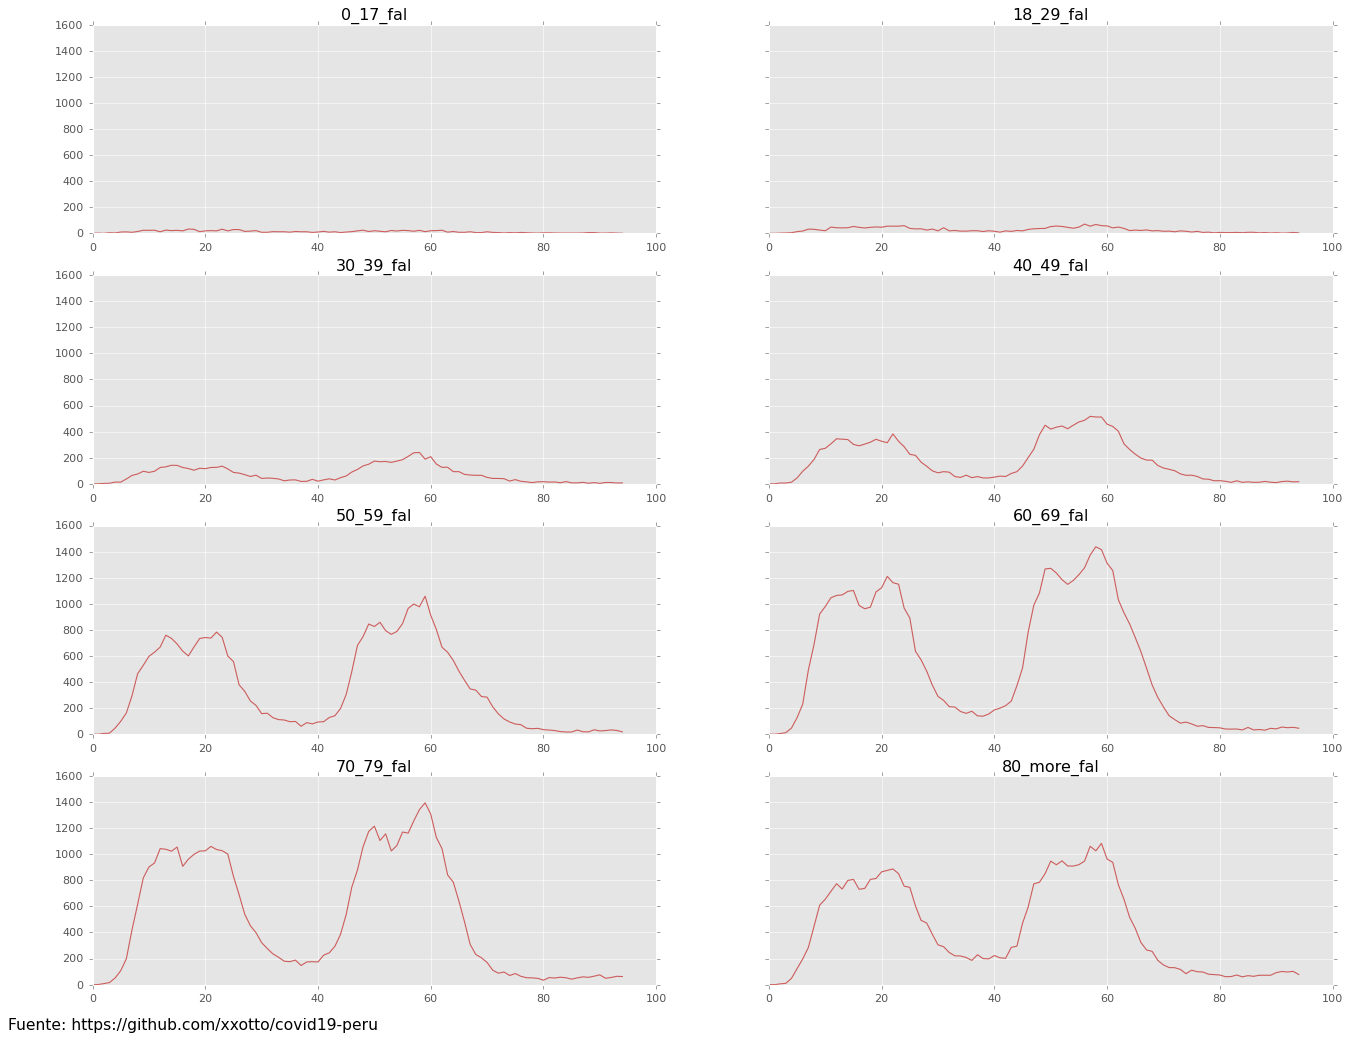

In [41]:
age_lst = list(dp1.columns[7:15])
#age_lst = [name.replace('_fal', '') for name in age_lst]

X = np.arange(len(dp1['epi_week']))
i, j = 0, 0

fig, axis = plt.subplots(4, 2, figsize=(20,15), sharey=True)
plt.style.use('ggplot')

for idx, name in enumerate(age_lst):

    axis[i, j].plot(X, dp1[name], color = 'indianred')
    axis[i, j].set_title(name)

    j+=1
    if j==2:
        i+=1
        j=0
        if i == 4:
            break

plt.text(-135, -340, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=14)
plt.savefig('Images/covid19-peru_fallecidos_x_edades_x_semanasEpi.png', bbox_inches='tight')

plt.show() 


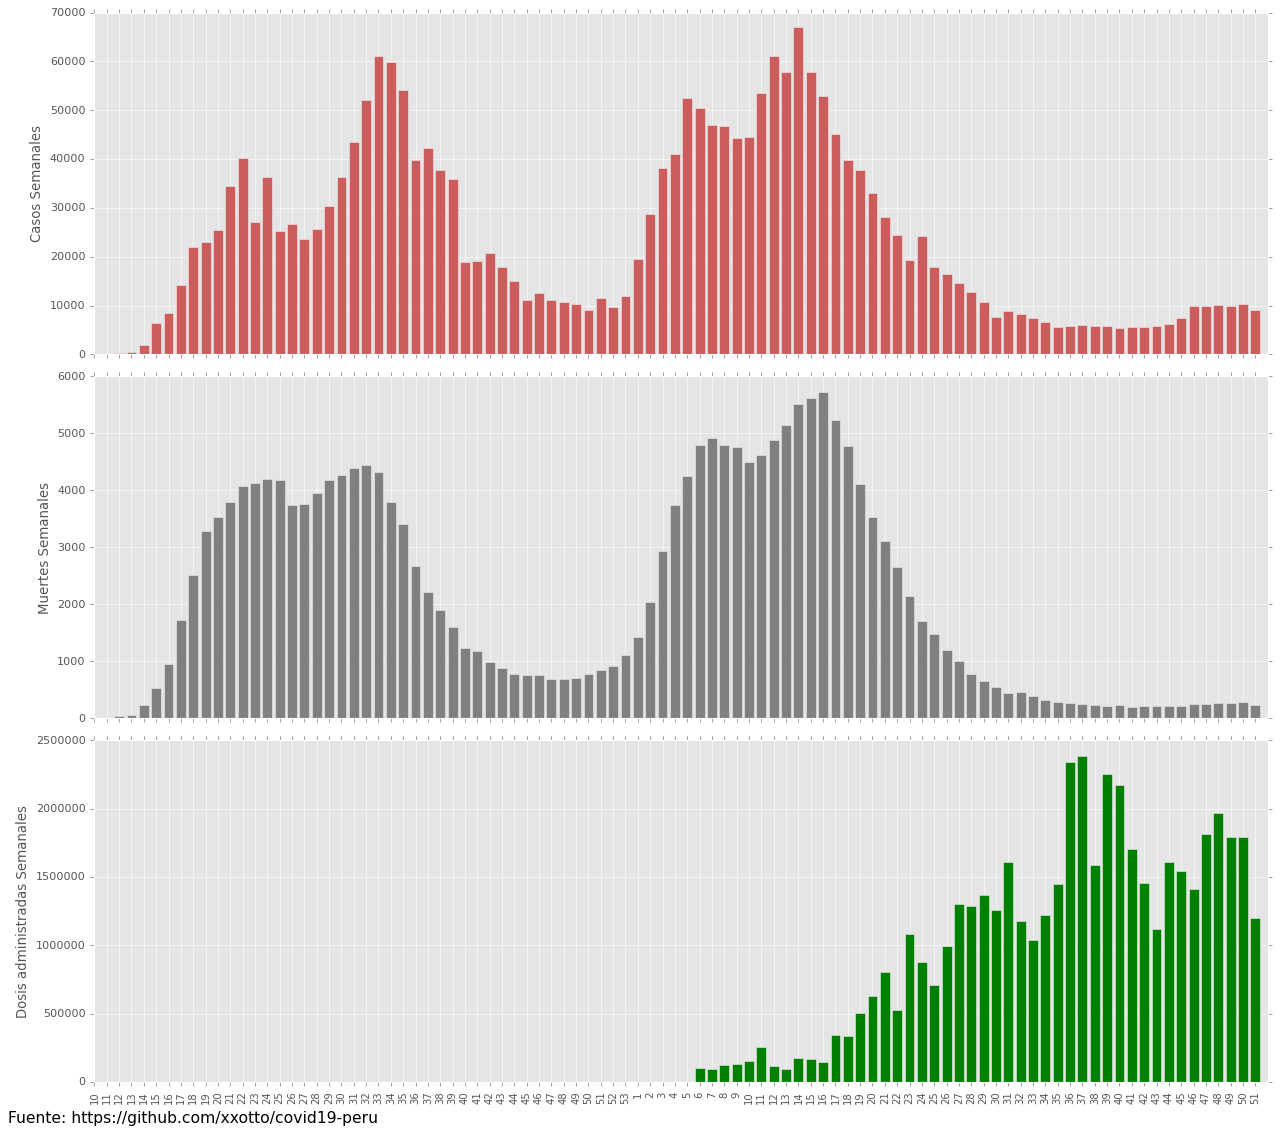

In [12]:
# Initialise the subplot function using number of rows and columns
X = np.arange(len(dp1['epi_week']))

fig, axis = plt.subplots(3, 1, figsize=(16,14), sharex=True)

axis[0].bar(X, dp1['total_casos'], color = 'indianred')
axis[0].set_ylabel('Casos Semanales')
axis[0].set_xlim(0, len(dp1['epi_week']))

axis[1].bar(X, dp1['total_fallecidos'], color = 'gray')
axis[1].set_ylabel('Muertes Semanales')

axis[2].bar(X, dp1['total_dosis_1'] + dp1['total_dosis_2'] + dp1['total_dosis_3'], color = 'green')
axis[2].set_ylabel('Dosis administradas Semanales')

axis[2].set_xticks(X, dp1['epi_week'], rotation = 90, size = 9)

plt.tight_layout()

plt.text(-7, -300000, r"Fuente: https://github.com/xxotto/covid19-peru", fontsize=14)
plt.savefig('Images/covid19-peru_resumen_casos,fallecidos,vacunas_x_semanasEpi.png', bbox_inches='tight')

plt.show()